In [21]:
%load_ext autoreload
%autoreload 2

from snippets.loader import *
import sys; sys.path.append('/home/yyr/data/VOCdevkit/')
from load_data import get_items, VOCDataset

_2007_root = Path("/home/yyr/data/VOCdevkit/VOC2007")
_2012_root = Path("/home/yyr/data/VOCdevkit/VOC2012")
objects = ['aeroplane', 'bicycle']
train_items = flatten([(get_items(_2007_root, f'{obj}_train') + get_items(_2012_root, f'{obj}_train')) for obj in objects])
val_items   = flatten([(get_items(_2007_root, f'{obj}_val') + get_items(_2012_root, f'{obj}_val')) for obj in objects])
logger.info(f'\n{len(train_items)} training images\n{len(val_items)} validation images')
trn = VOCDataset(train_items, objects=objects)

2020-05-13 20:43:39.798 | INFO     | __main__:<module>:13 - 
823 training images
880 validation images


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
dl = DataLoader(trn, collate_fn=trn.collate_fn)

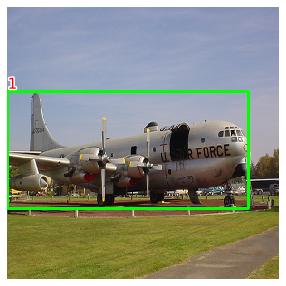

In [25]:
im,bbs,clss,_ = trn.sample()
show(im, bbs=bbs, texts=clss,sz=5)

In [26]:
from torchvision.models.detection import FasterRCNN
import torchvision

In [30]:
backbone = torchvision.models.mobilenet_v2(pretrained=True).features
backbone.out_channels = 1280
# anchor_generator = AnchorGenerator(sizes=((32, 64, 128, 256, 512),), aspect_ratios=((0.5, 1.0, 2.0),))
roi_pooler = torchvision.ops.MultiScaleRoIAlign(featmap_names=['0'], output_size=7, sampling_ratio=2)
model = FasterRCNN(backbone, num_classes=3)

In [31]:
x, *y = next(iter(dl))
model.eval()
output = model(x)

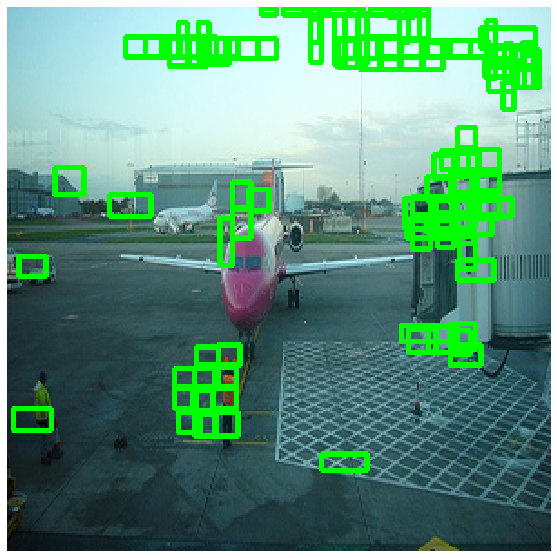

In [32]:
show(trn[0][0], bbs=bbfy(output[0]['boxes'].detach().numpy()))